<a href="https://colab.research.google.com/github/Mrdiegolopes/Mrdiegolopes/blob/main/resolucao_lista_ama1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Questão 1
Considere o conjunto de dados disponível em artificial1d.csv organizado em
duas colunas, x e y. Seja um modelo de regressão linear para yˆ = f(x).

a) Apresente os parâmetros do modelo e o MSE (erro quadrático médio)
obtidos pelo algoritmo OLS (mínimos quadrados ordinários). Plote
a reta resultante sobre os dados.

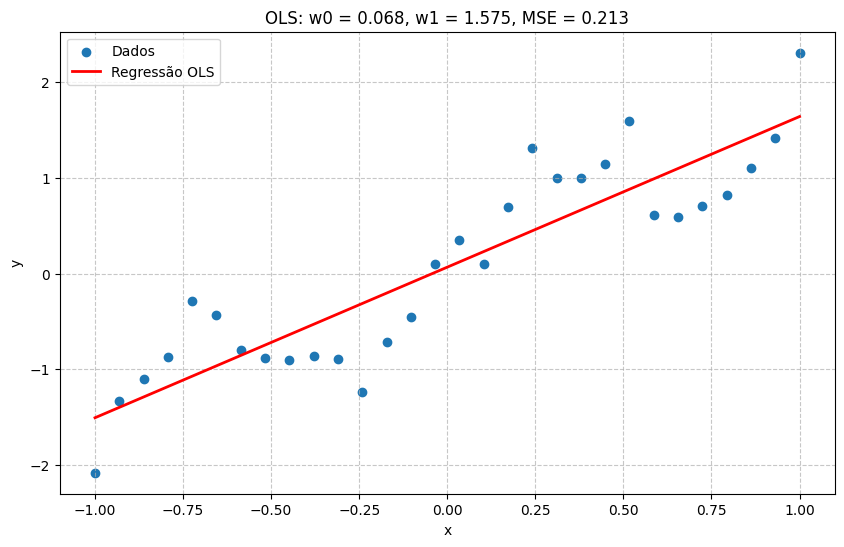

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Carregar dados
data = np.loadtxt('artificial1d.csv', delimiter=',')
X = data[:, 0]
y = data[:, 1]

# Função para calcular MSE
def compute_mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

X_aug = np.c_[np.ones(X.shape[0]), X]

# a) Solução OLS

# calculando parâmetros por fórmula analítica
w_ols = np.linalg.inv(X_aug.T @ X_aug) @ X_aug.T @ y
y_pred_ols = X_aug @ w_ols
mse_ols = compute_mse(y, y_pred_ols)

# plot dos resultados OLS
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Dados')
plt.plot(X, y_pred_ols, c='red', linewidth=2, label='Regressão OLS')
plt.title(f'OLS: w0 = {w_ols[0]:.3f}, w1 = {w_ols[1]:.3f}, MSE = {mse_ols:.3f}')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(linestyle='--', alpha=0.7)
plt.legend()
plt.show()




b)Apresente os parâmetros do modelo, o MSE e a curva de aprendizagem
obtidos pelo algoritmo GD (gradiente descendente). Plote a reta resultante sobre os dados.


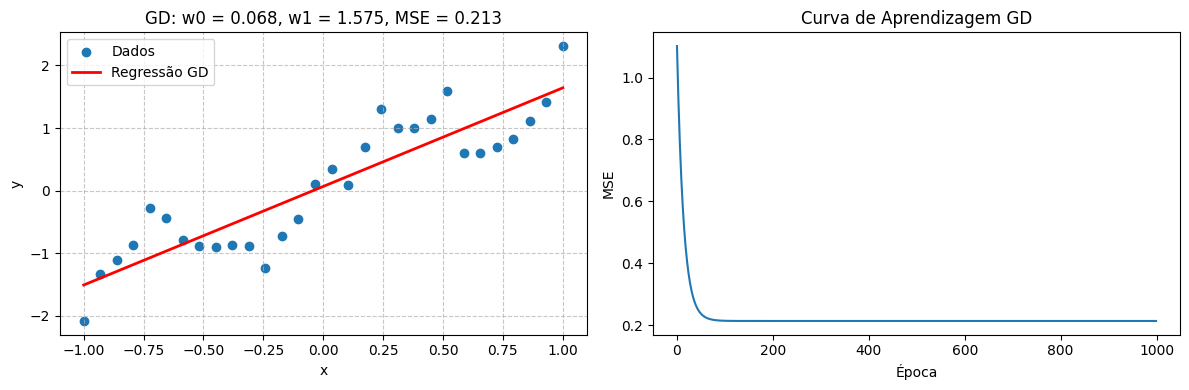

In [36]:
# b) Gradiente Descendente (GD)
# Hiperparâmetros
alpha = 0.1  #taxa de aprendizado
epochs = 1000
mse_history_gd = []

# iniciando os pesos
w_gd = np.zeros(2)

for epoch in range(epochs):
    # calculando predições
    y_pred = X_aug @ w_gd

    # calculando gradientes
    error = y - y_pred
    grad_w0 = -np.mean(error)
    grad_w1 = -np.mean(error * X)

    # atualizando pesos
    w_gd[0] -= alpha * grad_w0
    w_gd[1] -= alpha * grad_w1

    # armazenando MSE
    mse_history_gd.append(compute_mse(y, y_pred))

# resultados finais
y_pred_gd = X_aug @ w_gd
mse_gd = compute_mse(y, y_pred_gd)

# Plotar resultados GD
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.scatter(X, y, label='Dados')
plt.plot(X, y_pred_gd, c='red', linewidth=2, label='Regressão GD')
plt.title(f'GD: w0 = {w_gd[0]:.3f}, w1 = {w_gd[1]:.3f}, MSE = {mse_gd:.3f}')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(linestyle= '--', alpha= 0.7)

plt.subplot(1, 2, 2)
plt.plot(mse_history_gd)
plt.title('Curva de Aprendizagem GD')
plt.xlabel('Época')
plt.ylabel('MSE')
plt.tight_layout()
plt.show()


C) Apresente os parâmetros do modelo, o MSE e a curva de aprendizagem
obtidos pelo algoritmo SGD (gradiente descendente estocástico).
Plote a reta resultante sobre os dados

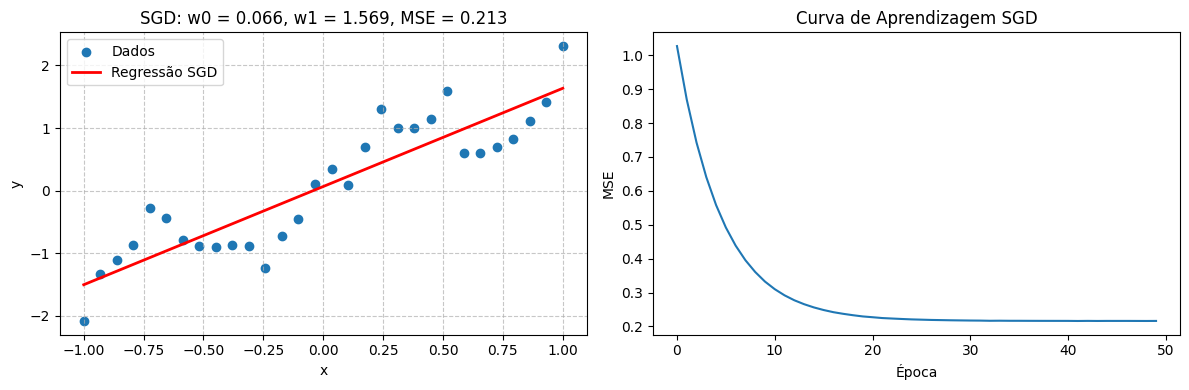


Comparação Final:
OLS:  w0 = 0.068, w1 = 1.575, MSE = 0.213
GD:   w0 = 0.068, w1 = 1.575, MSE = 0.213
SGD:  w0 = 0.066, w1 = 1.569, MSE = 0.213


In [37]:
# c) SGD
# Hiperparâmetros
alpha_sgd = 0.01
epochs_sgd = 50
mse_history_sgd = []

# iniciando os pesos
w_sgd = np.zeros(2)

for epoch in range(epochs_sgd):
    epoch_loss = 0
    for i in np.random.permutation(len(X)):
        # selecionando uma amostra
        xi = X_aug[i]
        yi = y[i]

        # calculando predição
        y_pred_i = xi @ w_sgd

        # calculano gradiente
        error = yi - y_pred_i
        grad = -error * xi

        # atualizando pesos
        w_sgd -= alpha_sgd * grad

        # acumulando erro
        epoch_loss += error**2

    # armazenando MSE
    mse_history_sgd.append(epoch_loss/len(X))

# resultados finais
y_pred_sgd = X_aug @ w_sgd
mse_sgd = compute_mse(y, y_pred_sgd)

# plot resultados SGD
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.scatter(X, y, label='Dados')
plt.plot(X, y_pred_sgd, c='red', linewidth=2, label='Regressão SGD')
plt.title(f'SGD: w0 = {w_sgd[0]:.3f}, w1 = {w_sgd[1]:.3f}, MSE = {mse_sgd:.3f}')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(linestyle= '--', alpha= 0.7)

plt.subplot(1, 2, 2)
plt.plot(mse_history_sgd)
plt.title('Curva de Aprendizagem SGD')
plt.xlabel('Época')
plt.ylabel('MSE')
plt.tight_layout()
plt.show()

# resultados numericosc
print('\nComparação Final:')
print(f'OLS:  w0 = {w_ols[0]:.3f}, w1 = {w_ols[1]:.3f}, MSE = {mse_ols:.3f}')
print(f'GD:   w0 = {w_gd[0]:.3f}, w1 = {w_gd[1]:.3f}, MSE = {mse_gd:.3f}')
print(f'SGD:  w0 = {w_sgd[0]:.3f}, w1 = {w_sgd[1]:.3f}, MSE = {mse_sgd:.3f}')

#Questão 2
Considere o conjunto de dados disponível em california.csv, organizado em 9
colunas, sendo as 8 primeiras colunas os atributos e a última coluna a saída.
Os 8 atributos são usados na predição da mediana de preços de casas em distritos da Califórnia na década de 1990. Maiores detalhes sobre os dados podem ser conferidos em https://scikit-learn.org/stable/datasets/real_
world.html#california-housing-dataset.

A) Aleatoriamente, divida o conjunto de dados em treino (80%) e teste (20%).

b) Treine 13 modelos de regressão polinomial, com ordens de 1 a 13. Você
pode usar o algoritmo OLS.

c) Reporte o RMSE (raiz quadrada do erro quadrático médio) no treinamento
e no teste para cada modelo. Faça um gráfico para o treino e um gráfico
para o teste.

d) Repita os 2 itens anteriores incluindo um termo de regularização L2
(por exemplo, com fator λ = 0.01).

Nota: Normalize os dados (a saída com StandardScaler e as entradas com
MinMax) antes do treinamento/teste (antes de criar os regressores polinomiais)
e “desnormalize” a saída antes de calcular o RMSE.


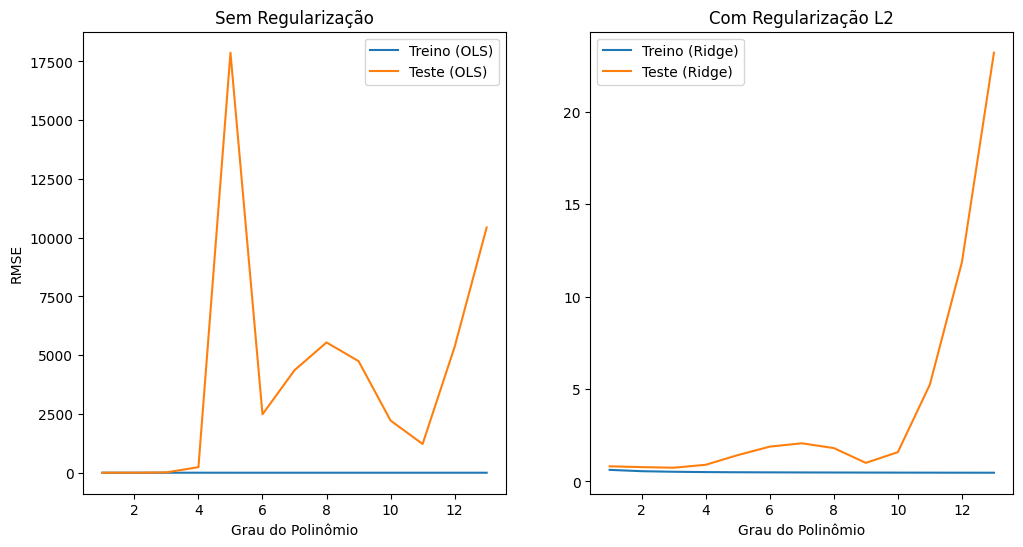

In [30]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


#carregamento dos dados
data= np.genfromtxt('california.csv', delimiter=',', skip_header=1)
X = data[:, :-1]
y = data[:, -1]

#a) divisão treino-teste (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# normalização
scaler_X = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).flatten()

# função para treinar e avaliar RMSE com modelos ols, ridge
def evaluate_models(X_train, X_test, y_train, y_test, model_type='ols', lambda_=0.01):
    train_rmse, test_rmse = [], []
    for degree in range(1, 14):
       #b) polinomiais grua 1...13
        poly = PolynomialFeatures(degree=degree, include_bias=False)
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)

        if model_type == 'ridge':
            model = Ridge(alpha=lambda_)
        else:
            model = LinearRegression()

        # predição e desnomalização
        model.fit(X_train_poly, y_train)
        y_train_pred = scaler_y.inverse_transform(model.predict(X_train_poly).reshape(-1, 1)).flatten()
        y_test_pred = scaler_y.inverse_transform(model.predict(X_test_poly).reshape(-1, 1)).flatten()

        # c) calculo RMSE para treino e teste
        train_rmse.append(np.sqrt(mean_squared_error(scaler_y.inverse_transform(y_train.reshape(-1, 1)), y_train_pred)))
        test_rmse.append(np.sqrt(mean_squared_error(scaler_y.inverse_transform(y_test.reshape(-1, 1)), y_test_pred)))

    return train_rmse, test_rmse

# d) resultados com regularização
train_rmse_ridge, test_rmse_ridge = evaluate_models(X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled, 'ridge', 0.01)

# resultados sem regularização
train_rmse_ols, test_rmse_ols = evaluate_models(X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled, 'ols')


# plot
degrees = range(1, 14)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(degrees, train_rmse_ols, label='Treino (OLS)')
plt.plot(degrees, test_rmse_ols, label='Teste (OLS)')
plt.xlabel('Grau do Polinômio')
plt.ylabel('RMSE')
plt.title('Sem Regularização')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(degrees, train_rmse_ridge, label='Treino (Ridge)')
plt.plot(degrees, test_rmse_ridge, label='Teste (Ridge)')
plt.xlabel('Grau do Polinômio')
plt.title('Com Regularização L2')
plt.legend()
plt.show()

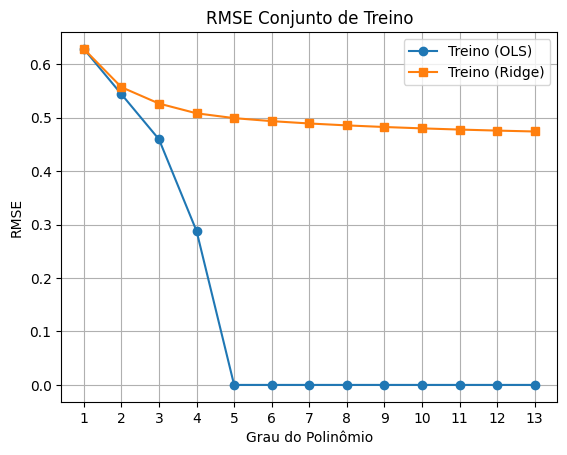

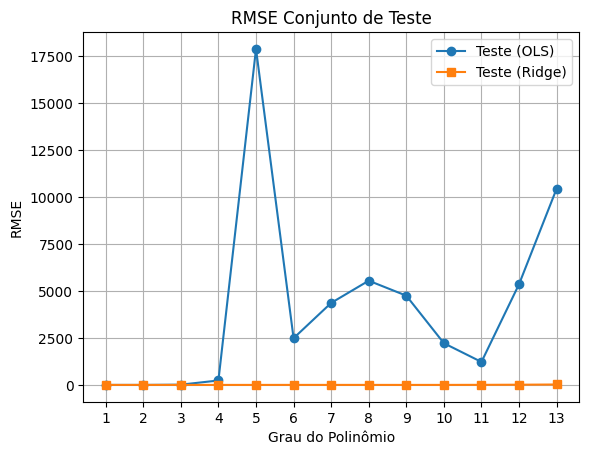

In [34]:
# plot isolado treino
plt.figure()
plt.plot(degrees, train_rmse_ols,   marker='o', label='Treino (OLS)')
plt.plot(degrees, train_rmse_ridge, marker='s', label='Treino (Ridge)')
plt.title('RMSE Conjunto de Treino')
plt.xlabel('Grau do Polinômio')
plt.ylabel('RMSE')
plt.xticks(degrees)
plt.legend()
plt.grid(True)
plt.show()

# teste
plt.figure()
plt.plot(degrees, test_rmse_ols,    marker='o', label='Teste (OLS)')
plt.plot(degrees, test_rmse_ridge,  marker='s', label='Teste (Ridge)')
plt.title('RMSE Conjunto de Teste')
plt.xlabel('Grau do Polinômio')
plt.ylabel('RMSE')
plt.xticks(degrees)
plt.legend()
plt.grid(True)
plt.show()
